In [2]:
!pip install sklearn

  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1316 sha256=f7d3258f5ef3c9e7f9c928a17de10321cab6e133df2d1cb09e3cca33ccdd8986
  Stored in directory: /Users/punitshah/Library/Caches/pip/wheels/23/9d/42/5ec745cbbb17517000a53cecc49d6a865450d1f5cb16dc8a9c
Successfully built sklearn


In [11]:
import numpy as np
import pandas as pd
import sklearn

from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

In [12]:
#In this tutorial, we’ll generate our own data using the make_blobs function from the sklearn.datasets module. 
#The centers parameter specifies the number of clusters.

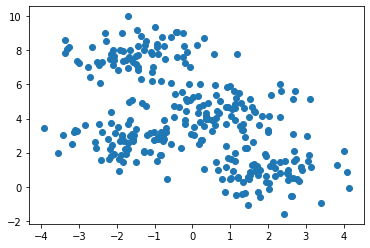

In [21]:
X, y = make_blobs(n_samples=300,centers=4,cluster_std=0.90, random_state=0)
plt.scatter(X[:,0], X[:,1])

In [3]:
#Training Examples
X[:10]

array([[ 0.63378839,  2.34280866],
       [-1.44122515,  7.33865044],
       [ 1.1850368 ,  5.23225746],
       [-0.98034307,  7.81149042],
       [ 1.14069873,  2.05835514],
       [ 3.66800921,  0.15565258],
       [-1.85510894,  1.37687336],
       [ 1.48663347,  4.39407536],
       [-0.0310449 ,  8.53153609],
       [-0.62157358,  8.79793486]])

In [75]:
#Target variables
y[:10]

array([1, 3, 0, 3, 1, 1, 2, 0, 3, 3])

In [76]:
#Lets define Kmeans model
kmeans = KMeans(n_clusters=2, 
                init='k-means++', 
                max_iter=300, 
                n_init=10, 
                random_state=0)

In [77]:
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [78]:
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [79]:
#Get the co-ordinates for centroids
kmeans.cluster_centers_

array([[-1.31105838,  7.63388948],
       [ 0.44413674,  2.65260238]])

In [80]:
#Within cluster sum of squares
kmeans.inertia_

1266.0756797730642

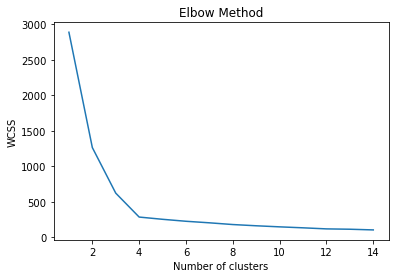

In [81]:
#Lets implement elbow method

wcss = []

for i in range(1, 15):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 15), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [22]:
#Implement clusters with 4 centers
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)

In [23]:
#Lets predict
pred_y = kmeans.fit_predict(X)

In [24]:
pred_y

array([1, 3, 2, 3, 0, 0, 1, 2, 3, 3, 1, 3, 2, 3, 0, 2, 2, 0, 1, 1, 0, 0,
       2, 1, 1, 1, 0, 2, 1, 2, 3, 3, 2, 3, 3, 3, 3, 3, 1, 0, 2, 1, 3, 2,
       1, 1, 3, 1, 3, 0, 1, 0, 3, 0, 0, 1, 3, 1, 3, 0, 3, 2, 3, 1, 1, 1,
       3, 0, 3, 1, 2, 2, 3, 1, 1, 3, 1, 2, 0, 3, 0, 2, 0, 0, 3, 2, 0, 2,
       3, 3, 2, 0, 3, 1, 1, 2, 0, 0, 2, 1, 3, 0, 3, 0, 2, 0, 0, 2, 3, 2,
       1, 1, 0, 3, 0, 2, 3, 0, 0, 2, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 3, 1,
       1, 0, 3, 1, 1, 3, 1, 3, 3, 1, 2, 1, 2, 1, 3, 2, 3, 3, 3, 2, 2, 2,
       0, 1, 3, 1, 0, 2, 3, 2, 2, 0, 2, 1, 1, 2, 0, 2, 2, 3, 0, 2, 1, 3,
       0, 0, 2, 1, 0, 2, 1, 1, 2, 2, 2, 2, 0, 3, 1, 1, 2, 2, 1, 1, 1, 2,
       1, 3, 2, 1, 0, 1, 2, 1, 1, 3, 2, 3, 2, 1, 2, 2, 3, 1, 1, 0, 0, 2,
       3, 0, 0, 1, 0, 1, 1, 3, 3, 2, 2, 3, 2, 0, 1, 2, 0, 1, 3, 1, 0, 2,
       0, 3, 3, 3, 3, 1, 1, 2, 2, 1, 0, 2, 1, 1, 2, 0, 0, 3, 2, 2, 1, 0,
       3, 1, 2, 3, 2, 0, 0, 1, 1, 0, 0, 0, 0, 2, 3, 3, 0, 0, 2, 0, 0, 0,
       3, 2, 3, 2, 0, 0, 3, 3, 3, 0, 0, 2, 3, 1], d

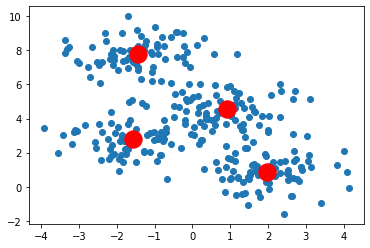

In [25]:
#Lets plot
plt.scatter(X[:,0], X[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

In [88]:
pred_y

array([0, 3, 2, 3, 0, 0, 1, 2, 3, 3, 1, 3, 2, 3, 0, 2, 2, 0, 1, 1, 0, 0,
       2, 1, 1, 2, 0, 2, 1, 2, 3, 3, 2, 3, 3, 3, 3, 3, 1, 0, 2, 1, 2, 2,
       1, 1, 3, 1, 3, 0, 1, 0, 3, 0, 0, 1, 3, 1, 3, 0, 3, 2, 3, 1, 1, 1,
       3, 0, 3, 1, 2, 1, 3, 1, 1, 3, 1, 2, 0, 3, 0, 2, 0, 0, 3, 2, 0, 2,
       3, 3, 2, 0, 3, 1, 1, 2, 0, 0, 2, 1, 3, 0, 3, 0, 2, 0, 0, 2, 3, 2,
       1, 1, 0, 3, 0, 2, 3, 0, 0, 2, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 3, 1,
       1, 0, 3, 1, 1, 3, 2, 3, 3, 1, 2, 1, 2, 1, 3, 2, 3, 3, 3, 2, 3, 2,
       0, 1, 3, 1, 0, 2, 3, 2, 2, 0, 2, 1, 1, 2, 0, 2, 2, 3, 0, 2, 1, 3,
       0, 0, 2, 1, 0, 2, 1, 1, 2, 2, 2, 2, 0, 3, 2, 1, 2, 2, 1, 1, 1, 2,
       1, 3, 2, 1, 0, 1, 2, 3, 1, 3, 2, 3, 2, 1, 2, 2, 3, 1, 1, 0, 0, 2,
       3, 0, 0, 1, 0, 1, 2, 3, 3, 2, 2, 3, 2, 0, 1, 2, 0, 1, 3, 1, 0, 2,
       0, 3, 3, 3, 3, 1, 1, 3, 2, 1, 0, 2, 1, 1, 2, 0, 0, 3, 2, 2, 1, 0,
       3, 1, 2, 3, 2, 0, 0, 1, 1, 2, 0, 0, 0, 2, 3, 3, 0, 0, 2, 0, 0, 0,
       3, 1, 3, 2, 0, 0, 3, 3, 3, 0, 0, 2, 3, 1])